In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import re
import tarfile
from pathlib import Path

In [3]:
meta = pd.read_csv('TableS1-XenopusMCE_allmetadata.tsv', sep='\t')
print(meta.columns)

Index(['CellBarcode', 'Stages', 'CellType', 'Phenograph', 'Pseudotime_Pltr',
       'Differentiation Potential_Pltr', 'Per Stage Louvain', 'CytoTRACE',
       'CV', 'CCphase', 'Branch Probabilities Basal',
       'Branch Probabilities Goblet', 'Branch Probabilities Ionocytes',
       'Branch Probabilities Multiciliated'],
      dtype='object')


In [3]:

tar_path = "GSE158088_RAW.tar"
out_dir = Path("GSE158088_RAW")

out_dir.mkdir(exist_ok=True)

with tarfile.open(tar_path, "r") as tar:
    tar.extractall(path=out_dir)
    

In [19]:
import os

# Simple version - just list everything
path = "GSE158088_RAW/GSM4790535_scCapSt08_count.out/outs/"

for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    sub_indent = ' ' * 2 * (level + 1)
    for file in files:
        print(f'{sub_indent}{file}')


/
  cloupe.cloupe
  filtered_gene_bc_matrices_h5.h5
  metrics_summary.csv
  molecule_info.h5
  raw_gene_bc_matrices_h5.h5
  web_summary.html
analysis/
  clustering/
    graphclust/
      clusters.csv
    kmeans_10_clusters/
      clusters.csv
    kmeans_2_clusters/
      clusters.csv
    kmeans_3_clusters/
      clusters.csv
    kmeans_4_clusters/
      clusters.csv
    kmeans_5_clusters/
      clusters.csv
    kmeans_6_clusters/
      clusters.csv
    kmeans_7_clusters/
      clusters.csv
    kmeans_8_clusters/
      clusters.csv
    kmeans_9_clusters/
      clusters.csv
  diffexp/
    graphclust/
      differential_expression.csv
    kmeans_10_clusters/
      differential_expression.csv
    kmeans_2_clusters/
      differential_expression.csv
    kmeans_3_clusters/
      differential_expression.csv
    kmeans_4_clusters/
      differential_expression.csv
    kmeans_5_clusters/
      differential_expression.csv
    kmeans_6_clusters/
      differential_expression.csv
    kmeans_7_clus

In [40]:
gz_path = Path("GSE158088_RAW\GSM4790544_scCapSt27_count.out.tar.gz")  # example
# create output directory (same name without .tar.gz)
out_dir = gz_path.with_suffix("").with_suffix("")  
# GSM4790535_scCapSt08_count.out

out_dir.mkdir(exist_ok=True)

with tarfile.open(gz_path, "r:gz") as tar:
    tar.extractall(path=out_dir)

list(out_dir.iterdir())



[WindowsPath('GSE158088_RAW/GSM4790544_scCapSt27_count.out/scCapSt27_count')]

In [41]:
h5_path = Path(
    r"GSE158088_RAW/GSM4790544_scCapSt27_count.out/scCapSt27_count/outs/filtered_gene_bc_matrices_h5.h5"
)

adata = sc.read_10x_h5(h5_path)
adata.var_names_make_unique()

adata

AnnData object with n_obs × n_vars = 5263 × 41560
    var: 'gene_ids'

In [42]:
print(adata.var_names)

Index(['gene25011|Xelaev18004747m', 'gene21250|Xetrov90028798m.L',
       'gene27977|Xelaev18004749m', 'gene26149|Xelaev18004750m',
       'gene25611|Xelaev18004751m', 'gene30800|Xelaev18004752m',
       'gene30310|Xelaev18004753m', 'gene21431|Xelaev18004754m',
       'gene2020|LOC108719298', 'gene22922|Xelaev18004756m',
       ...
       'gene18152|rnf112.1.S', 'gene19460|rnf112.S', 'gene5623|mfap4.S',
       'gene26573|Xelaev18047988m', 'gene42187|LOC100488177.S',
       'gene13224|LOC108702355', 'gene13974|LOC398467.L',
       'gene37157|LOC108703288', 'gene34762|LOC108702356',
       'gene24857|Xetrov90026942m.S'],
      dtype='object', length=41560)


In [43]:
print(adata.obs_names)

Index(['AAACCTGAGCTATGCT-1', 'AAACCTGAGGGTTCCC-1', 'AAACCTGCAGATGGGT-1',
       'AAACCTGCAGCCACCA-1', 'AAACCTGGTCTGCCAG-1', 'AAACCTGGTTCACGGC-1',
       'AAACCTGTCAATCACG-1', 'AAACCTGTCACCACCT-1', 'AAACCTGTCAGTTAGC-1',
       'AAACCTGTCATTGCGA-1',
       ...
       'TTTGTCACATAGTAAG-1', 'TTTGTCAGTACTTCTT-1', 'TTTGTCAGTCCGCTGA-1',
       'TTTGTCAGTCCTAGCG-1', 'TTTGTCAGTCGGGTCT-1', 'TTTGTCAGTCTCTCGT-1',
       'TTTGTCAGTTAAAGTG-1', 'TTTGTCAGTTCTGAAC-1', 'TTTGTCATCCGTAGGC-1',
       'TTTGTCATCCTGCAGG-1'],
      dtype='object', length=5263)


In [31]:
meta.head()

,CellBarcode,Stages,CellType,Phenograph,Pseudotime_Pltr,Differentiation Potential_Pltr,Per Stage Louvain,CytoTRACE,CV,CCphase,Branch Probabilities Basal,Branch Probabilities Goblet,Branch Probabilities Ionocytes,Branch Probabilities Multiciliated,barcode_base
0,st08_AAACGGGCAGTCAGCC,st08,Pluripotent,P2,0.060110,1.004686,0_st08,0.002059,0.461401,NaN,0.652235,0.123397,0.062206,0.162163,AAACGGGCAGTCAGCC
1,st08_AAACCTGCAATTCCTT,st08,Pluripotent,P2,0.093334,1.004656,0_st08,0.087940,0.483114,G1,0.652263,0.123407,0.062212,0.162118,AAACCTGCAATTCCTT
2,st08_AACCGCGAGCAGGTCA,st08,Pluripotent,P2,0.069792,1.004663,0_st08,0.057224,0.508959,G1,0.652256,0.123405,0.062211,0.162128,AACCGCGAGCAGGTCA
3,st08_AAAGATGAGATACACA,st08,Pluripotent,P2,0.054663,1.004684,0_st08,0.063403,0.581431,G2M,0.652236,0.123398,0.062206,0.162160,AAAGATGAGATACACA
4,st08_AACGTTGGTCGACTGC,st08,Pluripotent,P2,0.046804,1.004674,0_st08,0.042367,0.499320,G2M,0.652245,0.123401,0.062208,0.162145,AACGTTGGTCGACTGC


In [44]:
sample = h5_path.parents[1].name
print(sample)
m = re.search(r"St\d+", sample)
stage_from_path = m.group(0) if m else None

scCapSt27_count


In [46]:
adata.obs["barcode_base"] = adata.obs_names.astype(str).str.replace(r"-\d+$", "", regex=True)
meta["barcode_base"] = meta["CellBarcode"].astype(str).str.replace(r"-\d+$", "", regex=True)

print(adata.obs["barcode_base"].head())
print(meta["barcode_base"].head())

AAACCTGAGCTATGCT-1    AAACCTGAGCTATGCT
AAACCTGAGGGTTCCC-1    AAACCTGAGGGTTCCC
AAACCTGCAGATGGGT-1    AAACCTGCAGATGGGT
AAACCTGCAGCCACCA-1    AAACCTGCAGCCACCA
AAACCTGGTCTGCCAG-1    AAACCTGGTCTGCCAG
Name: barcode_base, dtype: object
0    st08_AAACGGGCAGTCAGCC
1    st08_AAACCTGCAATTCCTT
2    st08_AACCGCGAGCAGGTCA
3    st08_AAAGATGAGATACACA
4    st08_AACGTTGGTCGACTGC
Name: barcode_base, dtype: object


In [47]:
sample = h5_path.parents[1].name
m = re.search(r"St(\d+)", sample)
stage_prefix = f"st{m.group(1)}"
adata.obs["barcode_base"] = adata.obs_names.astype(str).str.replace(r"-\d+$", "", regex=True)

# meta base barcode: strip "st08_" and other "stXX_" prefixes
meta["barcode_base"] = (
    meta["CellBarcode"].astype(str)
    .str.replace(r"^st\d+_", "", regex=True)
)

# IMPORTANT: subset metadata to the stage we're loading (prevents cross-stage barcode collisions)
meta_stage = meta[meta["CellBarcode"].str.startswith(stage_prefix + "_")].copy()
meta_stage = meta_stage.set_index("barcode_base")

# join within this stage
adata.obs = adata.obs.set_index("barcode_base", drop=False)
common = adata.obs.index.intersection(meta_stage.index)
print("counts cells:", adata.n_obs)
print("meta cells (this stage):", meta_stage.shape[0])
print("matched:", len(common))

adata = adata[common].copy()
adata.obs = adata.obs.join(meta_stage.loc[common], how="left")

# now set obs_names to EXACT meta-style IDs: st08_<barcode>
adata.obs["cell_id_meta"] = stage_prefix + "_" + adata.obs["barcode_base"]
adata.obs_names = adata.obs["cell_id_meta"].tolist()

# quick check
print(adata.obs_names[:5])
print(adata.obs[["Stages", "CellType"]].head())


counts cells: 5263
meta cells (this stage): 3371
matched: 3371
Index(['st27_AAACCTGAGCTATGCT', 'st27_AAACCTGAGGGTTCCC',
       'st27_AAACCTGCAGATGGGT', 'st27_AAACCTGGTCTGCCAG',
       'st27_AAACCTGGTTCACGGC'],
      dtype='object')
                      Stages       CellType
st27_AAACCTGAGCTATGCT   st27       Ionocyte
st27_AAACCTGAGGGTTCCC   st27          Basal
st27_AAACCTGCAGATGGGT   st27  Multiciliated
st27_AAACCTGGTCTGCCAG   st27         Goblet
st27_AAACCTGGTTCACGGC   st27          Basal


In [48]:
print(adata)

AnnData object with n_obs × n_vars = 3371 × 41560
    obs: 'barcode_base', 'CellBarcode', 'Stages', 'CellType', 'Phenograph', 'Pseudotime_Pltr', 'Differentiation Potential_Pltr', 'Per Stage Louvain', 'CytoTRACE', 'CV', 'CCphase', 'Branch Probabilities Basal', 'Branch Probabilities Goblet', 'Branch Probabilities Ionocytes', 'Branch Probabilities Multiciliated', 'cell_id_meta'
    var: 'gene_ids'


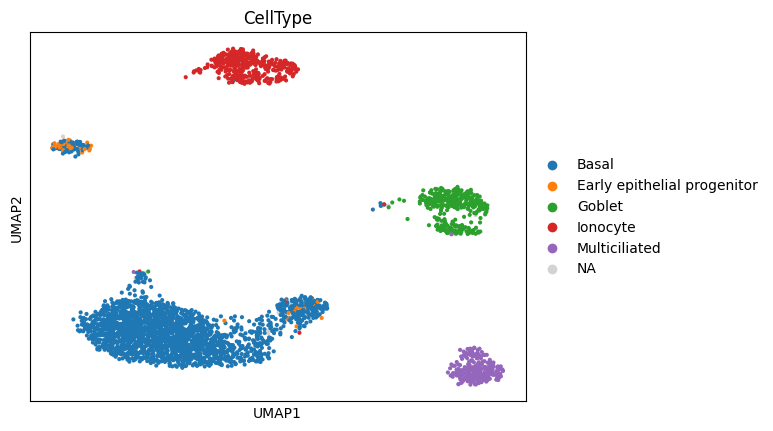

In [49]:
import scanpy as sc

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata); sc.pp.neighbors(adata); sc.tl.umap(adata)


sc.pl.umap(adata, color=["CellType"])
